In [0]:
from fastai.vision import *
torch.backends.cudnn.benchmark = True

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Make sure that Pytorch installed correctly in Colab
import torch
print(torch.__version__)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())

1.1.0
True
True


To load images faster use Google Images, search for some image (e.x I typed 'Vasnetsov paintings') scrolled down to load apprx 100-200 images.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:


```
urls = Array.from(document.querySelectorAll('.rg_di.rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```



In [0]:
#Create path for the folders where to load images
path = Path('/content/drive/My Drive/paintings')
file = 'shishkin.csv'
folder = 'shishkin'

#You'll need to repeat the same for other classes as well

In [0]:
dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('/content/drive/My Drive/paintings/rublev.csv'),
 PosixPath('/content/drive/My Drive/paintings/repin.csv'),
 PosixPath('/content/drive/My Drive/paintings/vrubel.csv'),
 PosixPath('/content/drive/My Drive/paintings/bryullov.csv'),
 PosixPath('/content/drive/My Drive/paintings/shishkin.csv'),
 PosixPath('/content/drive/My Drive/paintings/vasnetsov.csv'),
 PosixPath('/content/drive/My Drive/paintings/savrasov.csv'),
 PosixPath('/content/drive/My Drive/paintings/kustodiev.csv'),
 PosixPath('/content/drive/My Drive/paintings/aivazovsky.csv'),
 PosixPath('/content/drive/My Drive/paintings/serov.csv'),
 PosixPath('/content/drive/My Drive/paintings/rublev'),
 PosixPath('/content/drive/My Drive/paintings/repin'),
 PosixPath('/content/drive/My Drive/paintings/vrubel'),
 PosixPath('/content/drive/My Drive/paintings/bryullov'),
 PosixPath('/content/drive/My Drive/paintings/vasnetsov'),
 PosixPath('/content/drive/My Drive/paintings/savrasov'),
 PosixPath('/content/drive/My Drive/painting

In [0]:
classes = ['rublev', 'repin', 'vrubel', 'bryullov', 'shishkin', 'vasnetsov', 'savrasov', 'kustodiev', 'aivazovsky', 'serov']

In [0]:
download_images(path/file, dest, max_pics=200)


Error https://russianlife.com/sites/default/cache/file/6173656B-F373-1403-BCAEC53DB018AA43_fullpage.jpg HTTPSConnectionPool(host='russianlife.com', port=443): Read timed out. (read timeout=4)
Error http://www.ministryofshop.com/images/products/prod1376/CP075.jpg HTTPConnectionPool(host='www.ministryofshop.com', port=80): Max retries exceeded with url: /images/products/prod1376/CP075.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f81c3a024e0>, 'Connection to www.ministryofshop.com timed out. (connect timeout=4)'))


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

rublev


repin


vrubel


bryullov


shishkin


vasnetsov


savrasov


kustodiev


aivazovsky


serov


In [0]:
#Load images to ImageDataBunch object
bs=64
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=500, num_workers = 0, bs=bs//8).normalize(imagenet_stats)

In [8]:
data.classes

['aivazovsky',
 'bryullov',
 'kustodiev',
 'repin',
 'rublev',
 'savrasov',
 'serov',
 'shishkin',
 'vasnetsov',
 'vrubel']

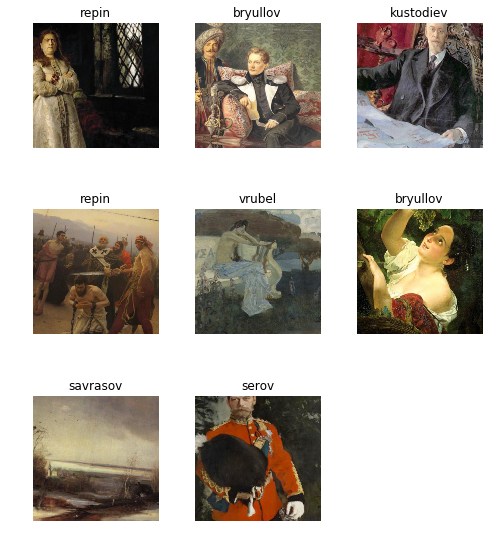

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
#Initialize model
learn = cnn_learner(data, models.resnet152, metrics=accuracy, ps=[0.001, 0.01])

In [37]:
#Start training
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.275274,0.923981,0.709677,03:27
1,0.946537,0.732255,0.747312,03:28
2,0.676563,0.763082,0.752688,03:29
3,0.523066,0.632402,0.790323,03:29
4,0.352968,0.598587,0.779570,03:29


In [0]:
#Save model 
learn.save('stage-1-1')

In [0]:
#Load previously saved model
learn.load('stage-1-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

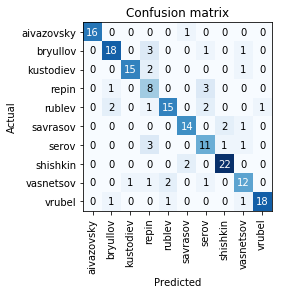

In [25]:
# Check the classification matrix
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


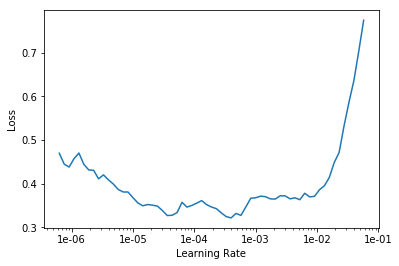

In [26]:
#Use next commands to check the learning rate best values
learn.lr_find()
learn.recorder.plot()

In [27]:
#Train for second stage with lower learning rates
learn.unfreeze()
learn.fit_one_cycle(4, max_lr = slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.423962,0.647462,0.198925,04:15
1,0.363630,0.593759,0.182796,04:14
2,0.249955,0.604324,0.188172,04:14
3,0.199138,0.609848,0.177419,04:15


In [0]:
learn.save('stage-2-1')

In [31]:
#Train for ine more cycle to check if error will decrease
learn.load('stage-2-1')
learn.fit_one_cycle(10, max_lr = 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.170537,0.627531,0.188172,04:16
1,0.177848,0.585507,0.182796,04:15
2,0.173329,0.592425,0.166667,04:15
3,0.165590,0.612955,0.161290,04:15
4,0.136443,0.630498,0.166667,04:15
5,0.117076,0.626853,0.188172,04:16
6,0.126069,0.608769,0.182796,04:15
7,0.113475,0.578044,0.177419,04:15
8,0.137110,0.598390,0.161290,04:15
9,0.101856,0.579470,0.166667,04:15


In [0]:
learn.save('stage-3')

In [0]:
#Export model as pickle file
learn.export('paintings-1.pkl')